In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
root = "sfh_1000_10_20250925_111440"

real_spec = np.load(f"/data/mustard/vmehta/{root}/{root}_snr_spectra.npy")
real_sfh = np.load(f"/data/mustard/vmehta/{root}/snr__all_true.npy")
wav = np.load(f"/data/mustard/vmehta/{root}/{root}_wavelength.npy")

def load_noisy_data(snr):
    if snr == None:
        pred_sfh = np.load(f"/data/mustard/vmehta/{root}/snr__all_pred.npy")
    else:
        pred_sfh = np.load(f"/data/mustard/vmehta/{root}/snr_{snr}_all_pred.npy")
    return pred_sfh

# Bin setup (used in multiple places)
bin_arr = np.r_[np.array([0.001, 0.1, 20, 50, 100, 200, 500])*1e6, np.logspace(9.5, 10.15, 4)]
binning = np.log10(bin_arr)
bin_widths = np.diff(binning)
bin_centers = binning[:-1] + bin_widths/2

snrNone = load_noisy_data(None)
snr500 = load_noisy_data(500)
snr250 = load_noisy_data(250)
snr100 = load_noisy_data(100)
snr50 = load_noisy_data(50)
snr25 = load_noisy_data(25)
snr10 = load_noisy_data(10)

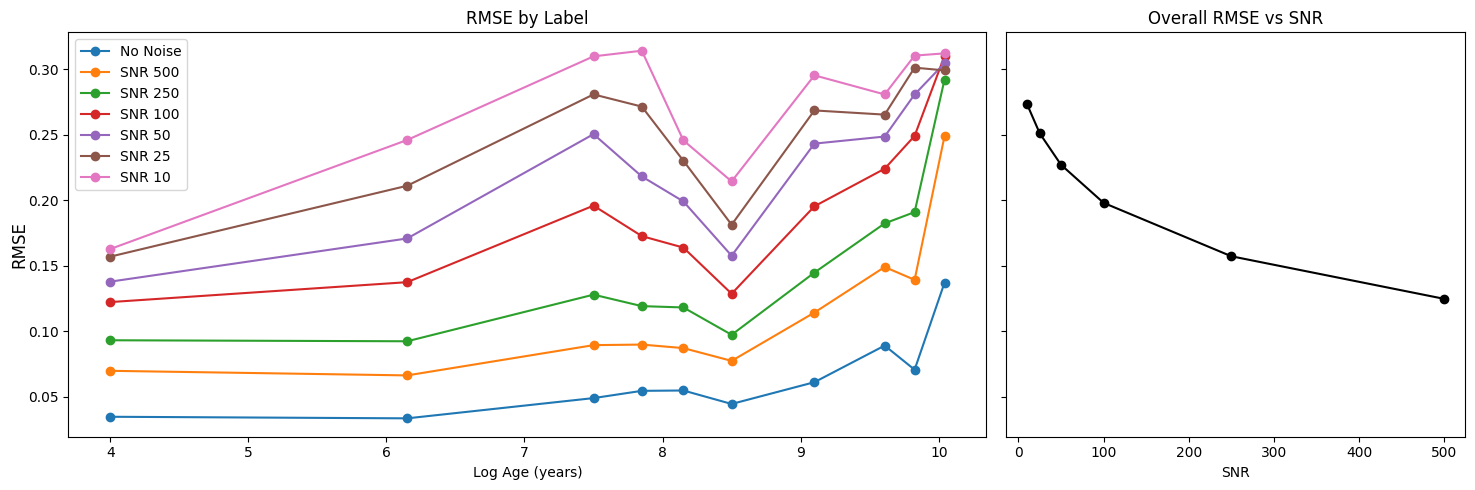

In [10]:
def rmse(pred_sfh):
    rmse = np.sqrt(mean_squared_error(real_sfh, pred_sfh, multioutput='raw_values'))
    overall_rmse = np.sqrt(mean_squared_error(real_sfh, pred_sfh))
    return rmse, overall_rmse

fig, ax = plt.subplots(1, 2, figsize=(15,5), sharey=True, gridspec_kw={'width_ratios': [2, 1]})

ax[0].plot(bin_centers, rmse(snrNone)[0], marker='o')
for s in [snr500, snr250, snr100, snr50, snr25, snr10]:
    ax[0].plot(bin_centers, rmse(s)[0], marker='o')
ax[0].set_xlabel('Log Age (years)')
ax[0].set_title('RMSE by Label')
ax[0].legend(labels=['No Noise', 'SNR 500', 'SNR 250', 'SNR 100', 'SNR 50', 'SNR 25', 'SNR 10'])

ax[1].plot(np.array([500, 250, 100, 50, 25, 10]), [rmse(snr500)[1], rmse(snr250)[1], rmse(snr100)[1], rmse(snr50)[1], rmse(snr25)[1], rmse(snr10)[1]], 'ko-')
ax[1].set_title('Overall RMSE vs SNR')
ax[1].set_xlabel('SNR')

fig.supylabel('RMSE')
plt.tight_layout()

In [12]:
def plot_sfh(snr, n):
    plt.figure(figsize=(10,5))
    plt.bar(bin_centers, real_sfh[n], width=bin_widths, alpha=0.5, label='True SFH', color='grey', edgecolor='black')
    plt.bar(bin_centers, snr[n], width=bin_widths, alpha=0.3, label='Predicted SFH', color='red', edgecolor='red')
    plt.bar(bin_centers, snrNone[n], width=bin_widths, alpha=0.3, label='Predicted SFH (No Noise)', color='blue', edgecolor='blue')
    plt.xlabel('Log Age (years)')
    plt.ylabel('f')
    plt.title(f'Star Formation History Comparison (n={n})')
    plt.legend()
    plt.show()

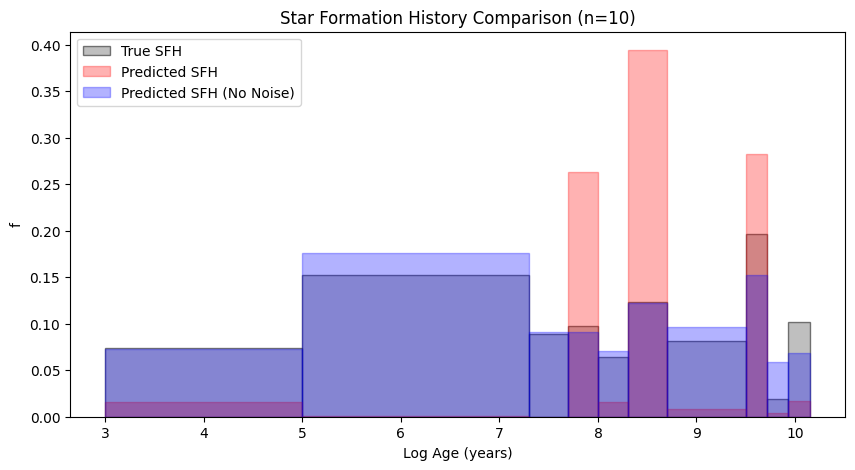

In [13]:
plot_sfh(snr100, 10)

In [14]:
def plot_diff(snr):
    pred_sfh = load_noisy_data(snr)
    nonoise_sfh = load_noisy_data(None)

    diff = pred_sfh - real_sfh
    nonoise_diff = nonoise_sfh - real_sfh

    median = np.median(diff, axis=0)
    sixteen = np.percentile(diff, 16, axis=0)
    eightyfour = np.percentile(diff, 84, axis=0)

    median_nonoise = np.median(nonoise_diff, axis=0)
    sixteen_nonoise = np.percentile(nonoise_diff, 16, axis=0)
    eightyfour_nonoise = np.percentile(nonoise_diff, 84, axis=0)

    plt.figure(figsize=(10,5))
    plt.errorbar(bin_centers, median, yerr=[median - sixteen, eightyfour - median], fmt='o', capsize=5, label=f'SNR {snr}')
    plt.errorbar(bin_centers, median_nonoise, yerr=[median_nonoise - sixteen_nonoise, eightyfour_nonoise - median_nonoise], fmt='o', capsize=5, label='No Noise')
    plt.xlabel('log(Age)')
    plt.ylabel('Difference (pred - true)')
    plt.xlim(2.5,10.5)
    plt.legend()
    plt.show()

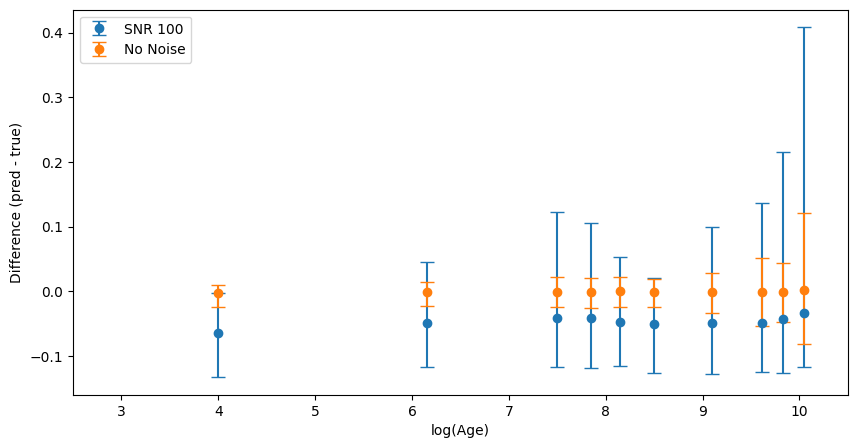

In [15]:
plot_diff(100)